In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
loan = pd.read_csv("loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\AKANSHA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Understanding The Data

In [105]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [106]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

_Here in this dataset some of the important columns are_ _loan__amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc._

In [107]:
loan.shape

(39717, 111)

# Cleaning The Data

In [108]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [109]:
# Dropping all columns with only null values
loan=loan.dropna(axis=1,how='all')

In [110]:
#Remove columns with only one unique values
loan= loan.loc[:,loan.nunique()!=1]

In [111]:
loan.isnull().sum(axis=0)

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [112]:
round(loan.isnull().sum()/len(loan)*100,2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec   

In [113]:
# Drop columns with more than 70% null values
loan=loan.loc[:,round(loan.isnull().sum()/len(loan)*100,2)<70]
loan.shape

(39717, 46)

In [114]:
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal 

In [115]:
drop_columns=['id','member_id', 'emp_title', 'url', 'desc','title', 'earliest_cr_line',
              'last_pymnt_d','last_credit_pull_d','collection_recovery_fee', 'inq_last_6mths']
loan=loan.drop(drop_columns,axis=1)

In [116]:
#check whether all columns are in the correct format.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
loan_amnt                 39717 non-null int64
funded_amnt               39717 non-null int64
funded_amnt_inv           39717 non-null float64
term                      39717 non-null object
int_rate                  39717 non-null object
installment               39717 non-null float64
grade                     39717 non-null object
sub_grade                 39717 non-null object
emp_length                38642 non-null object
home_ownership            39717 non-null object
annual_inc                39717 non-null float64
verification_status       39717 non-null object
issue_d                   39717 non-null object
loan_status               39717 non-null object
purpose                   39717 non-null object
zip_code                  39717 non-null object
addr_state                39717 non-null object
dti                       39717 non-null float64
delinq_2yrs              

In [117]:
# Converting revol_util and int_rate into a numeric type
loan.revol_util=loan.revol_util.str.rstrip('%').astype('float')
loan.int_rate=loan.int_rate.str.rstrip('%').astype('float')

# Converting zip code to numbric by removing the X coded for braveity
loan['zip_code'] = loan['zip_code'].apply(lambda s: int(s[:-2]))
loan["pub_rec_bankruptcies"].fillna(0.0, inplace=True)
loan["revol_util"].fillna(0.0, inplace=True)
loan.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                    int64
addr_state                 object
dti                       float64
delinq_2yrs                 int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prnc

In [118]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

# Understanding The Data

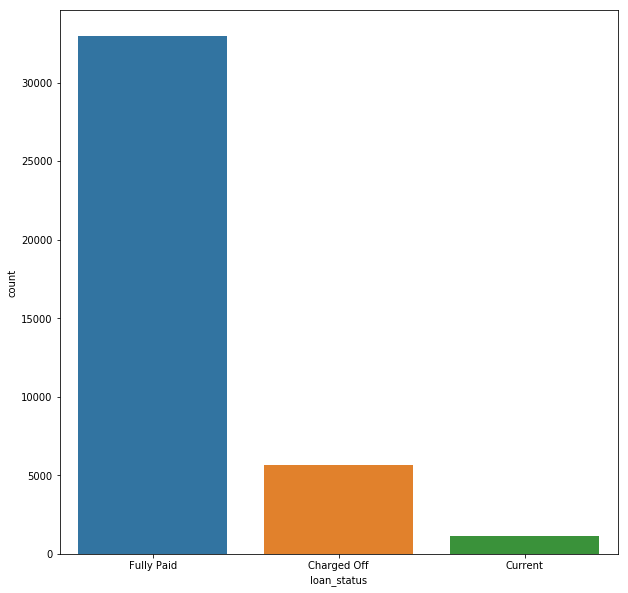

In [119]:
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", data=loan)
plt.show()

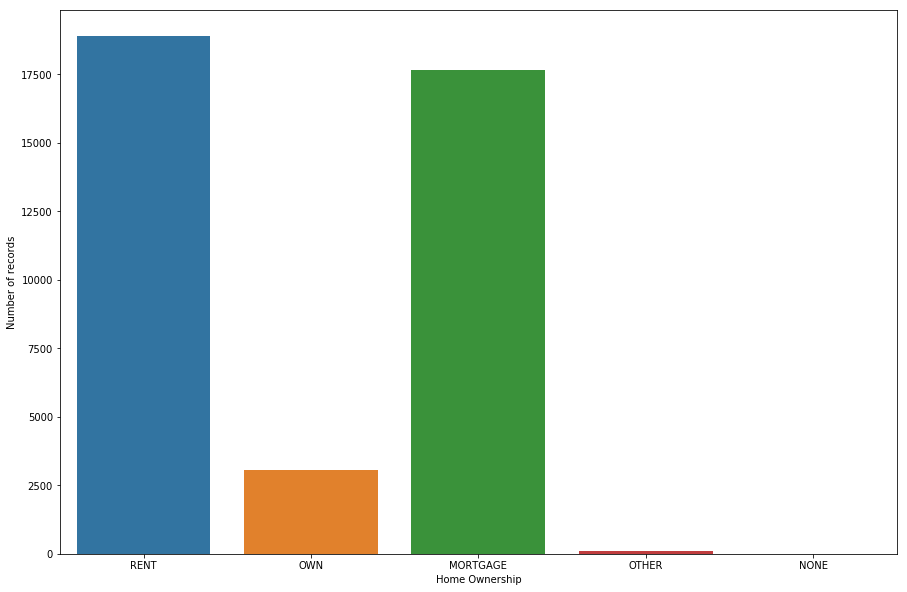

In [120]:
plt.figure(figsize=(15,10))
sns.countplot(x='home_ownership',  data=loan)
plt.xlabel("Home Ownership")
plt.ylabel("Number of records")
plt.show()

In [121]:
#modification for convinence
paid = loan[loan.loan_status == 'Fully Paid']
current = loan[loan.loan_status == 'Current']
default = loan[loan.loan_status == 'Charged Off']
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

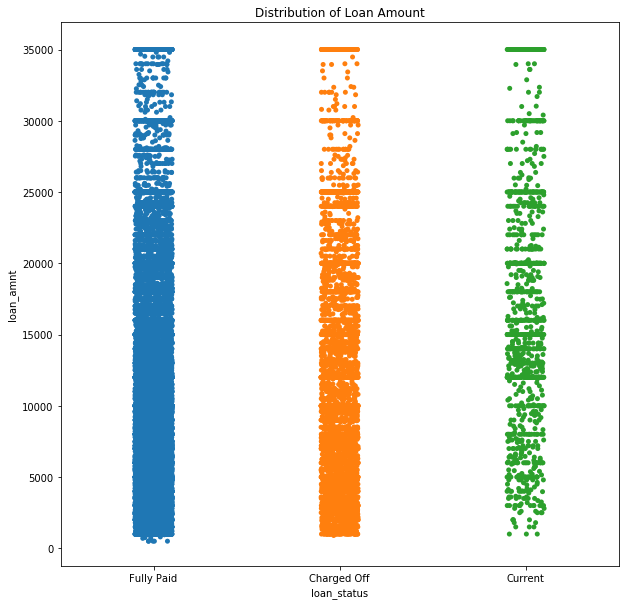

In [122]:
plt.figure(figsize=(10,10))
plt.title("Distribution of Loan Amount")
sns.stripplot(x="loan_status", y="loan_amnt", data=loan, jitter=True);
plt.show()

_This graph shows **HOW LOANS ARE DISTIBUTED**_

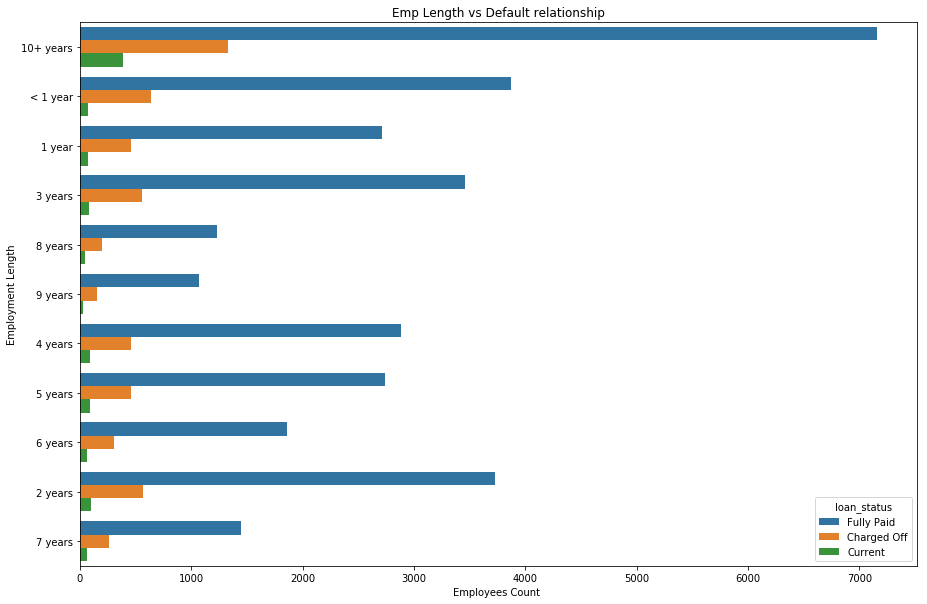

In [123]:
plt.figure(figsize=(15,10))
sns.countplot(y='emp_length',hue='loan_status',data=loan)
plt.xlabel("Employees Count ")
plt.ylabel("Employment Length")
plt.title("Emp Length vs Default relationship")
plt.show()

_This graph shows **RELATIONSHIP WITH  THE EMPLOYEES **_

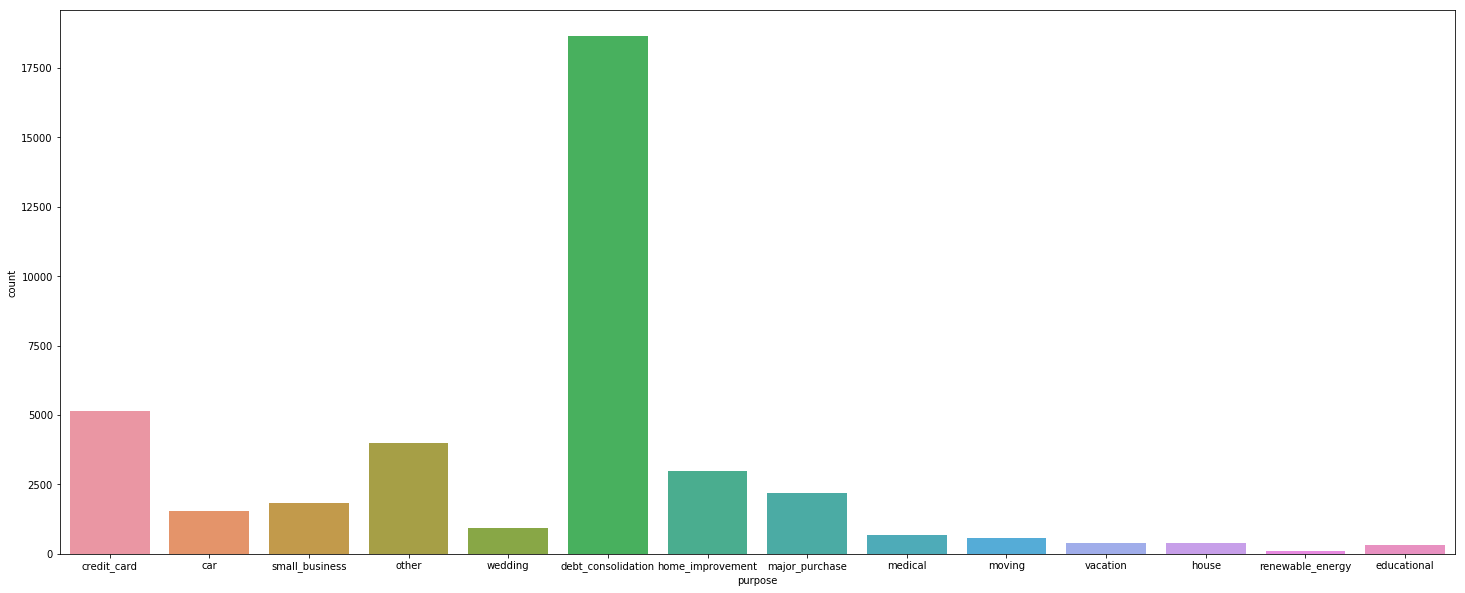

In [124]:
plt.figure(figsize=(25,10))
sns.countplot(x='purpose',  data=loan)
plt.show()

**PURPOSE FOR TAKING LOAN** <br>
_This graph indicates debt consoliddation is the major reason for which people took loan ._

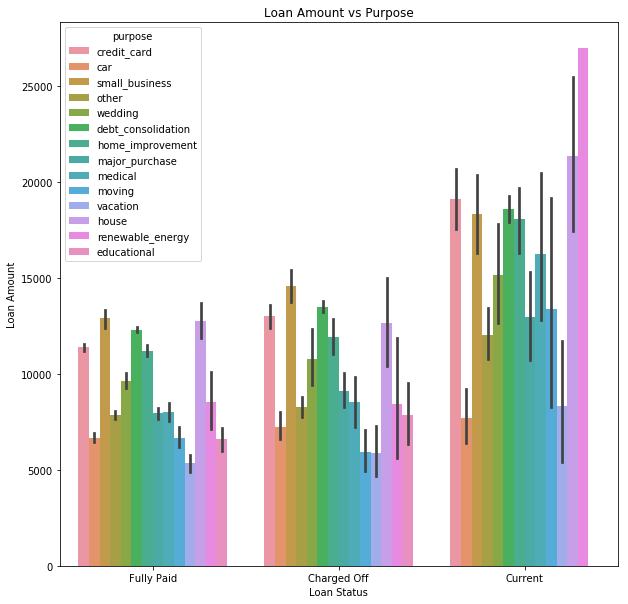

In [125]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_amnt',hue='purpose',data=loan)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Purpose")
plt.show()

_This graph shows currently most amount of loan the people took is for renewable enenrgy and most charged of for small business._

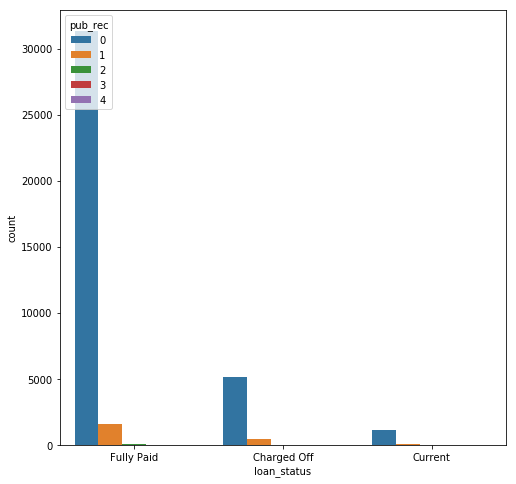

In [126]:
plt.figure(figsize=(8,8))
sns.countplot(x="loan_status", hue='pub_rec', data=loan)
plt.show()

In [127]:
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

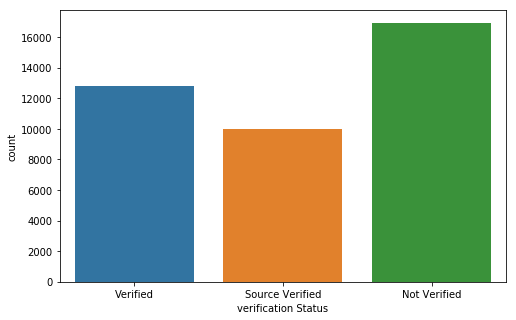

In [128]:
plt.figure(figsize=(8,5))
sns.countplot(x='verification_status', data=loan)
plt.xlabel("verification Status")
plt.show()

_This graph clearly shows the carelessness of the bank._

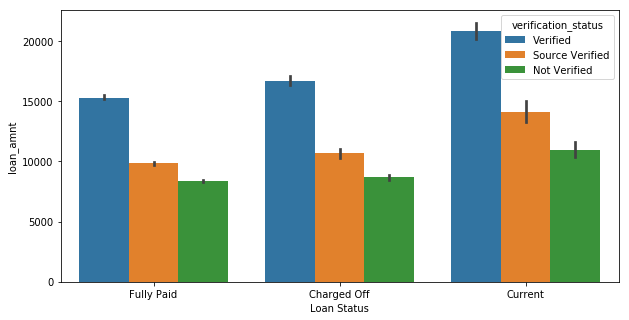

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()

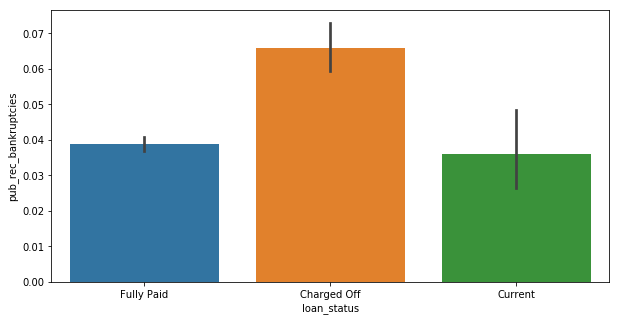

In [130]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status',y='pub_rec_bankruptcies', data=loan)
plt.show()

_The deduction that bankruptcies happened due to charged off can be concluded by this graph._

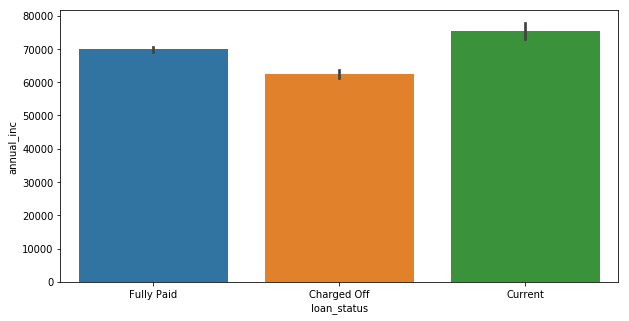

In [131]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status',y='annual_inc', data=loan)
plt.show()

_This graph indicates annual income less than 70000 are having the high probability of grtting charged off._

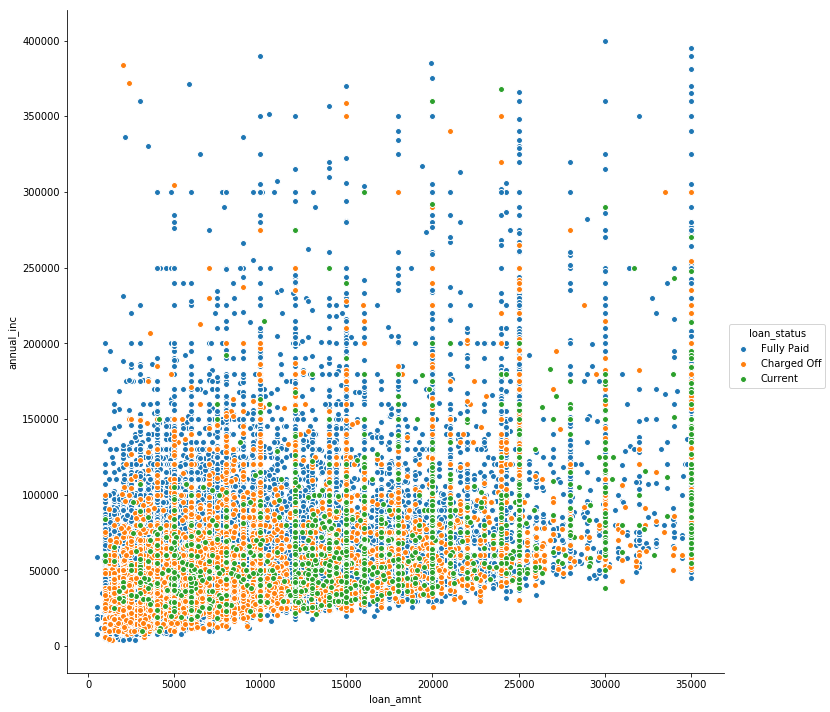

In [132]:
a = loan[loan['annual_inc'] < 400000] 
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=a, hue="loan_status", size=10)
plt.show()

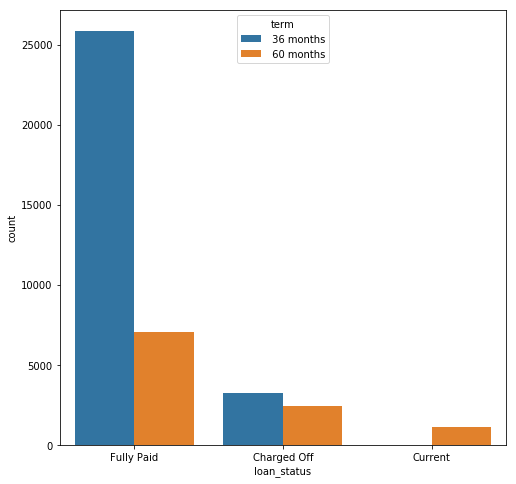

In [133]:
plt.figure(figsize=(8,8))
sns.countplot(x="loan_status", hue='term', data=loan)
plt.show()

_This graph shows that most of the charged off are took place on 36 months term loan._

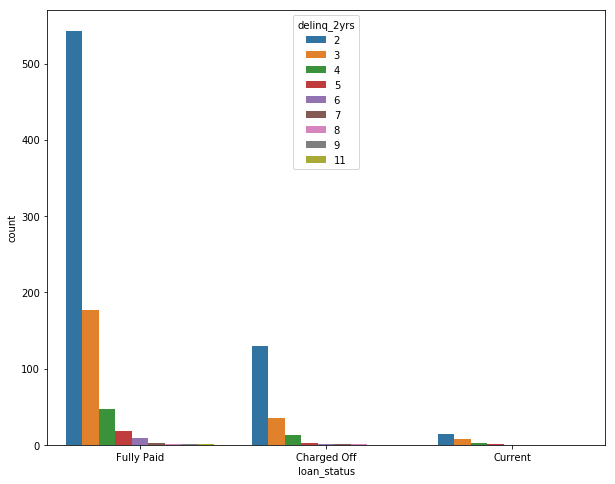

In [134]:
plt.figure(figsize=(10,8))
a = loan[loan['delinq_2yrs'] > 1]
sns.countplot(x="loan_status", hue='delinq_2yrs', data=a)
plt.show()

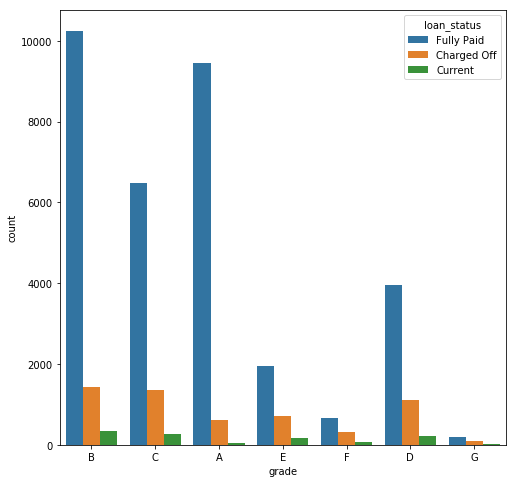

In [135]:
plt.figure(figsize=(8,8))
sns.countplot(x="grade", hue='loan_status', data=loan)
plt.show()

_This graph indicates that most of the charged off took place at B and C grade._

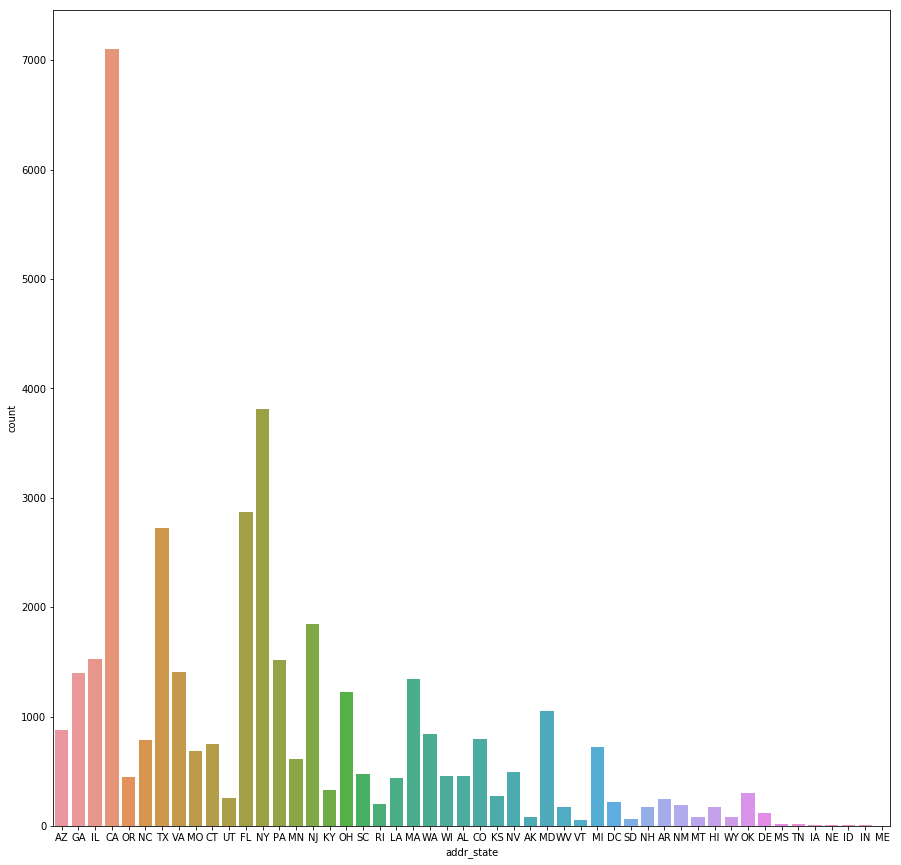

In [136]:
plt.figure(figsize=(15,15))
sns.countplot(x="addr_state", data=loan)
plt.show()

_This graph shows cities that took most number of loans._